## Erste Versuche mit OSMNX



In [2]:
import networkx as nx
import osmnx as ox
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import random
import math

/home/daniel/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/home/daniel/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/home/daniel/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


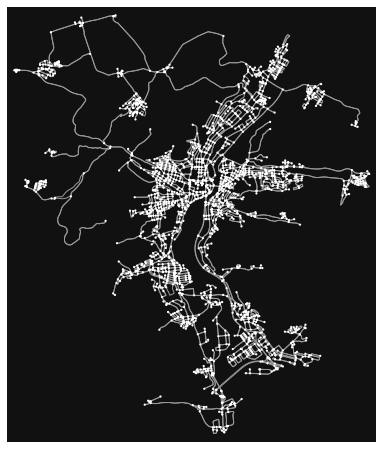

In [3]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place("Jena, Germany", network_type="drive")
fig, ax = ox.plot_graph(G, node_size=5)

In [1]:
#list(G.nodes)

In [3]:
#type(G.nodes.data())

networkx.classes.reportviews.NodeDataView

In [4]:
x_index_and_values=list(G.nodes.data("x"))
y_index_and_values=list(G.nodes.data("y"))
Num_Nodes=len(x_index_and_values)

In [5]:
#print(x_index_and_values[3][1])

11.5972133


In [5]:
X=np.zeros(2*Num_Nodes)
X=X.reshape(Num_Nodes,2)
for i in range(Num_Nodes):
    X[i,0]=x_index_and_values[i][1]
    X[i,1]=y_index_and_values[i][1]

In [6]:
clustering = DBSCAN(eps=0.01, min_samples=5).fit(X)

In [7]:
col_list=[]
for i in range(int(Num_Nodes)):
    random.seed(clustering.labels_[i])
    col_list.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))    

In [103]:
"#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])

'#48514F'

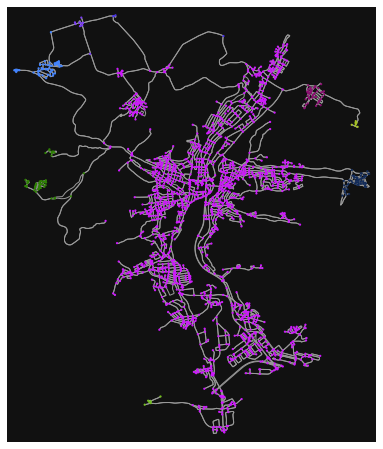

In [8]:
fig, ax = ox.plot_graph(G, node_size=5,node_color=col_list)

In [79]:
print(clustering)

DBSCAN(eps=5, min_samples=4)


In [80]:
print(X)

[[11.6241041 50.8789929]
 [11.5935316 50.8719092]
 [11.5979319 50.8676555]
 ...
 [11.5827954 50.9231636]
 [11.5829731 50.9231385]
 [11.5649047 50.9213532]]


In [55]:
# you can convert your graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
486374,50.878993,11.624104,3,NaN,NaN,POINT (11.62410 50.87899)
486611,50.871909,11.593532,3,NaN,NaN,POINT (11.59353 50.87191)
31918151,50.867655,11.597932,4,NaN,NaN,POINT (11.59793 50.86766)
31918156,50.872317,11.597213,3,motorway_junction,NaN,POINT (11.59721 50.87232)
31993078,50.867541,11.599958,3,NaN,NaN,POINT (11.59996 50.86754)


In [5]:
#gdf_edges.head(10)

osmid lanes  \
u        v          key                                                       
31918151 3579364826 0                                         4903733     2   
         271959925  0    [170709723, 157504029, 157504014, 199998366]     2   
         31993078   0                            [4903732, 270937839]     2   
         31993087   0               [317664121, 270937836, 270937837]     2   
31918156 1478289439 0                                       134465497     1   
         1789167540 0                                       134465550     2   
31993078 31918151   0                            [4903732, 270937839]     2   
         31995620   0                                         4903771     2   
         31993087   0                [23734531, 187161107, 270937838]   NaN   
31993087 1270681906 0                                        24785229     2   

                          ref                           name  \
u        v          key                                        
31918151 3579364826 0     K 2                   Am Dorfplatz   
         271959925  0     NaN                            NaN   
         31993078   0     NaN               Alter Handelsweg   
         31993087   0     K 2  [Am Leutrabach, Am Dorfplatz]   
31918156 1478289439 0     NaN                            NaN   
         1789167540 0    B 88                            NaN   
31993078 31918151   0     NaN               Alter Handelsweg   
         31995620   0     NaN               Alter Handelsweg   
         31993087   0     NaN                  An der Kirche   
31993087 1270681906 0     K 2                  Am Leutrabach   

                                             highway  maxspeed  oneway  \
u        v          key                                                  
31918151 3579364826 0                       tertiary        50   False   
         271959925  0                       tertiary        50   False   
         31993078   0    [unclassified, residential]  [50, 30]   False   
         31993087   0                       tertiary  [50, 30]   False   
31918156 1478289439 0                     trunk_link        50    True   
         1789167540 0                          trunk        80    True   
31993078 31918151   0    [unclassified, residential]  [50, 30]   False   
         31995620   0                   unclassified        30   False   
         31993087   0                    residential       NaN   False   
31993087 1270681906 0                       tertiary        30   False   

                          length  \
u        v          key            
31918151 3579364826 0     53.912   
         271959925  0    160.711   
         31993078   0    179.312   
         31993087   0    255.956   
31918156 1478289439 0    161.180   
         1789167540 0    367.312   
31993078 31918151   0    179.312   
         31995620   0     31.139   
         31993087   0    145.498   
31993087 1270681906 0     23.243   

                                                                  geometry  \
u        v          key                                                      
31918151 3579364826 0    LINESTRING (11.59793 50.86766, 11.59775 50.867...   
         271959925  0    LINESTRING (11.59793 50.86766, 11.59792 50.867...   
         31993078   0    LINESTRING (11.59793 50.86766, 11.59799 50.867...   
         31993087   0    LINESTRING (11.59793 50.86766, 11.59804 50.867...   
31918156 1478289439 0    LINESTRING (11.59721 50.87232, 11.59726 50.872...   
         1789167540 0    LINESTRING (11.59721 50.87232, 11.59730 50.872...   
31993078 31918151   0    LINESTRING (11.59996 50.86754, 11.59983 50.867...   
         31995620   0    LINESTRING (11.59996 50.86754, 11.60000 50.867...   
         31993087   0    LINESTRING (11.59996 50.86754, 11.59999 50.867...   
31993087 1270681906 0    LINESTRING (11.60103 50.86847, 11.60134 50.86853)   

                        bridge width tunnel access area junction  
u        v          

In [14]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

98249473.52678213

## Einige Daten über das Netzwerk:

In [15]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

/home/daniel/anaconda3/lib/python3.8/site-packages/osmnx/simplification.py:423: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  return gpd.GeoSeries(list(merged), crs=G.graph["crs"])
/home/daniel/anaconda3/lib/python3.8/site-packages/osmnx/simplification.py:423: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return gpd.GeoSeries(list(merged), crs=G.graph["crs"])


{'n': 2222,
 'm': 5464,
 'k_avg': 4.918091809180918,
 'edge_length_total': 729022.3760000002,
 'edge_length_avg': 133.42283601756958,
 'streets_per_node_avg': 2.677767776777678,
 'streets_per_node_counts': {0: 0, 1: 473, 2: 31, 3: 1467, 4: 242, 5: 8, 6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.21287128712871287,
  2: 0.01395139513951395,
  3: 0.6602160216021602,
  4: 0.10891089108910891,
  5: 0.0036003600360036,
  6: 0.00045004500450045},
 'intersection_count': 1749,
 'street_length_total': 398313.20899999916,
 'street_segment_count': 2967,
 'street_length_avg': 134.24779541624508,
 'circuity_avg': 1.0914536484314419,
 'self_loop_proportion': 0.005729693292888439,
 'clean_intersection_count': 1386,
 'node_density_km': 22.615897268846922,
 'intersection_density_km': 17.801622107656737,
 'edge_density_km': 7420.114834521467,
 'street_density_km': 4054.100187024633,
 'clean_intersection_density_km': 14.106945821161942}

Erklärung in https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=ox.basic_stats#osmnx.stats.basic_stats

n:= Number of Nodes
m:= Number of edges
k_avg Average Degree of a node

In [7]:
# save graph to disk as geopackage (for GIS) or graphml file (for gephi etc)
ox.save_graph_geopackage(G, filepath="./data/mynetwork.gpkg")
ox.save_graphml(G, filepath="./data/mynetwork.graphml")

## Kmean


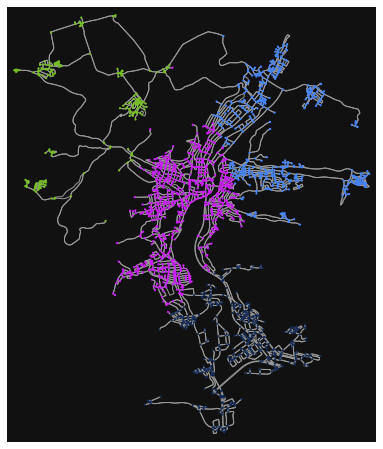

[[11.58107947 50.92233771]
 [11.6221475  50.94252161]
 [11.60369    50.88521512]
 [11.53745887 50.94979859]]


In [10]:
model=KMeans(4)
model.fit(X)
centers = np.array(model.cluster_centers_)

len(model.labels_)

col_list=[]
for i in range(int(Num_Nodes)):
    random.seed(model.labels_[i])
    col_list.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))  
fig, ax = ox.plot_graph(G, node_size=5,node_color=col_list)
ax.scatter(centers[:,0], centers[:,1], marker="x", color='r',s=1000)
print(centers)

## Testen zur Distanzmessung

In [78]:
lis_nodes_test=ox.distance.shortest_path(G, 31918156, 31918151, weight='length', cpus=1)
print(lis_nodes_test)
gdf_nodes.head()
type(gdf_nodes.head())
G.nodes[31918156]["x"]
dist=0
for i in range(len(lis_nodes_test)-1):
        node_1=lis_nodes_test[i]
        node_2=lis_nodes_test[i+1]
        x_1=G.nodes[node_1]["x"]
        y_1=G.nodes[node_1]["y"]
        x_2=G.nodes[node_2]["x"]
        y_2=G.nodes[node_2]["y"]
        curr_dis=ox.distance.euclidean_dist_vec(x_1,y_1,x_2,y_2)
        dist+=curr_dis
print(dist)
x_1=G.nodes[31918156]["x"]
y_1=G.nodes[31918156]["y"]
x_2=G.nodes[31918151]["x"]
y_2=G.nodes[31918151]["y"]
print(ox.distance.euclidean_dist_vec(x_1,y_1,x_2,y_2))

[31918156, 1478289439, 1789167697, 1478289425, 1478289401, 1478289398, 1789167671, 1789167670, 271959925, 31918151]
0.006245239478364029
0.004716859675675107


In [84]:
G.edges[(31918156, 1478289439,0)]["length"]

161.18000000000004

In [131]:
lis_nodes_test=ox.distance.shortest_path(G, 31918156, 31918151, weight='length', cpus=1)
#print(lis_nodes_test)
#gdf_nodes.head()
#type(gdf_nodes.head())
#G.nodes[31918156]["x"]
dist=0
for i in range(len(lis_nodes_test)-1):
        node_1=lis_nodes_test[i]
        node_2=lis_nodes_test[i+1]
        curr_dis=G.edges[(node_1,node_2,0)]["length"]
        dist+=curr_dis
print(dist)
print(ox.distance.euclidean_dist_vec(y_1,x_1,y_2,x_2)*71/111*(abs(x_1-x_2)/abs(y_1-y_2))*1000)
print(x_1,x_2,y_1,y_2)

664.6490000000001
0.4650738294433033
11.5972133 11.5979319 50.8723173 50.8676555


In [133]:

x_1=G.nodes[31918156]["x"]
x_2=G.nodes[31918151]["x"]
y_1=G.nodes[31918156]["y"]
y_2=G.nodes[31918151]["y"]
print(x_1)
print(math.sqrt(((x_1-x_2)*71)**2+((y_1-y_2)*111)**2)*1000)

11.5972133
519.9689858448419


In [105]:
G.nodes[31918156]["x"]

11.5972133

## Umsetzung der Distanzmessung in Funktionen

In [13]:
def euclidean_weighted(x_1,x_2,y_1,y_2):
    return(math.sqrt(((x_1-x_2)*71)**2+((y_1-y_2)*111)**2)*1000)
def length_between_nodes(n_1,n_2):
    lis_nodes_test=ox.distance.shortest_path(G, n_1,n_2, weight='length', cpus=1)
    dist=0
    for i in range(len(lis_nodes_test)-1):
        node_1=lis_nodes_test[i]
        node_2=lis_nodes_test[i+1]
        curr_dis=G.edges[(node_1,node_2,0)]["length"]
        dist+=curr_dis
    return dist
print(length_between_nodes(31918156,31918151))
def euc_between_nodes(n_1,n_2):
    x_1=G.nodes[n_1]["x"]
    x_2=G.nodes[n_2]["x"]
    y_1=G.nodes[n_1]["y"]
    y_2=G.nodes[n_2]["y"]
    return (euclidean_weighted(x_1,x_2,y_1,y_2))
euc_between_nodes(31918156,31918151)

664.6490000000001


519.9689858448419

## Vergleiche Euklidische Distanzen mit Straßenlänge


In [19]:
list_of_nodes=list(G.nodes())
m=10
list_of_random_nodes=random.sample(range(0, 2222), m)
street_dist=np.zeros(m*m)
street_dist=street_dist.reshape(m,m)

euc_dist=np.zeros(m*m).reshape(m,m)

for i in range(m):
    for j in range(m):
        if(i!=j):
            node_i=list_of_nodes[i]
            node_j=list_of_nodes[j]
            #print(node_i,node_j)
            if(ox.distance.shortest_path(G, node_i,node_j, weight='length', cpus=1)!= None):
                street_dist[i][j]=length_between_nodes(node_i,node_j)
                euc_dist[i][j]=euc_between_nodes(node_i,node_j)
#print(euc_dist)
#print("gsd")
#print(street_dist)
#print(street_dist)
print(street_dist-euc_dist)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.75004646e+02  1.23206001e+03  0.00000000e+00  1.22555001e+03
   3.48924497e+01  1.82374087e+01  2.44397781e+01  1.25066185e+03
   4.95849946e+02  5.37488450e+02]
 [ 7.64833955e+02  1.42046331e+03  1.44680014e+02  0.00000000e+00
   2.79119214e+02  4.14974788e+02  4.06971112e+02  1.14614583e+03
   3.85414488e+02  4.43021076e+02]
 [ 1.16436225e+03  1.31174337e+03  3.48924497e+01  1.35998921e+03
   0.00000000e+00  1.73666993e+01  3.96964926e+01  1.53629304e+03
   2.68883528e+02  2.96876156e+02]
 [ 1.36313127e+03  1.39923157e+03  1.82374087e+01  1.49584479e+03
   1.73666993e+01  0.00000000e+00  4.98069111e+00  1.73665500e+03
   2.86846595e+02  3.14254681e+02

In [20]:
diff=street_dist-euc_dist
print(diff/street_dist)

[[        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan]
 [ 0.28051629  0.68515342         nan  0.7021121   0.19459071  0.07125212
   0.05876331  0.40010565  0.44607109  0.45067002]
 [ 0.27190896  0.84262487  0.21767883         nan  0.33072525  0.45076313
   0.41416685  0.40652191  0.25744312  0.28072445]
 [ 0.35298926  0.66332179  0.19459071  0.70654993         nan  0.1193604
   0.12996324  0.46481921  0.28841437  0.29297057]
 [ 0.4038643   0.68116274  0.07125212  0.74737121  0.1193604          nan
   0.03113983  0.51353205  0.26614578  0.27118296]
 [ 0.45604495  0.63802855  0.05876331  0.72102932  0.12996324  0.03113983
          nan  0.56271073  0.26786591  0.26710327]
 [ 0.01601082  0.28103458  0.57225397  0.55010315  0.6123621   0.64543
   0.6797107          nan  0.53965491  0.5342963 ]
 [ 0

<ipython-input-20-dc5a2374caba>:2: RuntimeWarning: invalid value encountered in true_divide
  print(diff/street_dist)


Sei $\text{euk}((u,v))$, die euklidische Distanz zwischen zwei Knoten und $\text{street}(u,v)$ die Länge der Straßenabschnitte zwischen zwei Knoten $u,v$.
Obere Tabelle zeigt für die zufällig ausgesuchten Knotenpaaren $\frac{\text{street}(u,v)-\text{euk}((u,v))}{\text{street}(u,v)}$, also wie viel $\%/100$ die euklidische Distanz Kürzer ist als die Weg der Straße

In [ ]:
length_between_nodes(31918156,31918151)
print(ox.distance.shortest_path(G, 486374,486611, weight='length', cpus=1))